# Example 6 - Other plots

In this example, we'll plot other plots in the result section.

In [1]:
import os
import numpy as np
import pandas as pd
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
fig_dir = "figures/"
pkl_dir = "pkl/"

## Step 1. Sv threshold & ROI detection

In this step, we'll plot the how different Sv threshold impact recall & precision. 

In [3]:
df_threshold = pd.read_pickle(pkl_dir + 'df_threshold.pkl')

In [11]:
res_plot = []
for threshold in df_threshold['threshold'].unique():
    df = df_threshold[df_threshold['threshold']==threshold]
    recall = df['annotations_valid'].sum() / df['annotations_all'].sum()
    precision = df['roi_valid'].sum() / df['roi_all'].sum()
    F1 = 1.0/(1.0/recall + 1.0/precision)
    res_plot.append({'threshold': threshold, 'recall': recall, 'precision': precision, 'F1': F1})
    print(f'threshold: {threshold}, recall: {recall}, precision: {precision}, F1: {F1}')
res = pd.DataFrame(res_plot)

threshold: -54, recall: 0.05463182897862233, precision: 0.440337909186906, F1: 0.048601891171492564
threshold: -56, recall: 0.08123515439429929, precision: 0.46337579617834396, F1: 0.0691179718394373
threshold: -58, recall: 0.11401425178147269, precision: 0.473967684021544, F1: 0.09190600522193212
threshold: -60, recall: 0.1667458432304038, precision: 0.49513776337115073, F1: 0.12473819119415061
threshold: -62, recall: 0.28741092636579574, precision: 0.509112426035503, F1: 0.1837039347937177
threshold: -64, recall: 0.643230403800475, precision: 0.41631186801490155, F1: 0.252735976745264
threshold: -66, recall: 0.9135391923990499, precision: 0.17770936822220668, F1: 0.14876947249766456
threshold: -68, recall: 0.9434679334916865, precision: 0.05685845712992987, F1: 0.05362662782151073
threshold: -70, recall: 0.8679334916864608, precision: 0.02342840831741431, F1: 0.022812619919587232
threshold: -72, recall: 0.8038004750593825, precision: 0.01125058520599251, F1: 0.011095287368043456
thre

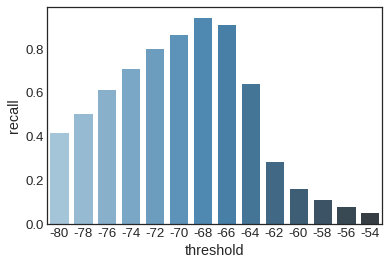

In [13]:
sns.barplot(x='threshold', y='recall', data=res, palette="Blues_d")

In [19]:
sns.barplot(x='threshold', y='recall', data=res, palette="Oranges_d")
plt.xticks(fontsize=17)
plt.xlabel('Minimum Sv value', fontsize=22)
plt.ylabel('Recall', fontsize=22)
plt.yticks(fontsize=17)
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=0.1)
plt.savefig(fig_dir + "ROI_recall.png", dpi=300)
plt.close()

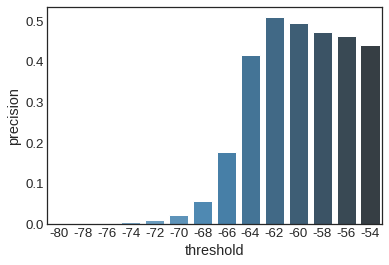

In [14]:
sns.barplot(x='threshold', y='precision', data=res, palette="Blues_d")

In [20]:
sns.barplot(x='threshold', y='precision', data=res, palette="Oranges_d")
plt.xticks(fontsize=17)
plt.xlabel('Minimum Sv value', fontsize=22)
plt.ylabel('Precision', fontsize=22)
plt.yticks(fontsize=17)
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=0.1)
plt.savefig(fig_dir + "ROI_precision.png", dpi=300)
plt.close()

## Step 2. Feature importance (RF model)

In this step, we'll show feature importance in RF model. 

In [10]:
with open(pkl_dir + 'model_RF.pkl', 'rb') as handle:
    c = pickle.load(handle)

In [11]:
# load features
acoustic_features = ['Sv_18kHz_min', 'Sv_18kHz_p5', 'Sv_18kHz_p25', 'Sv_18kHz_p50', 'Sv_18kHz_p75', 'Sv_18kHz_p95', 'Sv_18kHz_max', 'Sv_18kHz_std', 'Sv_38kHz_min', 'Sv_38kHz_p5', 'Sv_38kHz_p25', 'Sv_38kHz_p50', 'Sv_38kHz_p75', 'Sv_38kHz_p95', 'Sv_38kHz_max', 'Sv_38kHz_std', 'Sv_120kHz_min', 'Sv_120kHz_p5', 'Sv_120kHz_p25', 'Sv_120kHz_p50', 'Sv_120kHz_p75', 'Sv_120kHz_p95', 'Sv_120kHz_max', 'Sv_120kHz_std', 'Sv_200kHz_min', 'Sv_200kHz_p5', 'Sv_200kHz_p25', 'Sv_200kHz_p50', 'Sv_200kHz_p75', 'Sv_200kHz_p95', 'Sv_200kHz_max', 'Sv_200kHz_std', 'Sv_ref_18kHz', 'Sv_ref_120kHz', 'Sv_ref_200kHz']
geometric_features = ['length', 'thickness', 'area', 'perimeter', 'rectangularity', 'compact', 'circularity', 'elongation']
geographic_features_vertical = ['total_water_column', 'depth', 'relative_altitude']
geographic_features_horizontal = ['latitude', 'longitude']
sel_features = acoustic_features + geometric_features + geographic_features_vertical + geographic_features_horizontal

In [16]:
# feature importance
importance = c.feature_importances_
indices = np.argsort(importance)
cols = sel_features
sorted_cols = [cols[i] for i in indices]
pal = sns.color_palette("Blues", 33) + sns.color_palette("Blues", 15)
sns.barplot(x=importance[indices], y=sorted_cols, palette=pal)
# plt.barh(np.arange(0, len(importance)), importance[indices], align='center', alpha=0.7, height=0.6, color='blue')
plt.yticks(np.arange(0, len(importance)), sorted_cols, fontsize=12)
plt.ylim([len(importance)-15.6, len(importance)-0.3])
plt.xlabel('Feature Importance', fontsize=15.5)
plt.xticks(fontsize=12)
plt.savefig(fig_dir + "feature importance.png", bbox_inches='tight', dpi=300)
plt.close()

In [14]:
len(sorted_cols)

48

## Step 3. Analyze labeled:unlabeled ratio (PU learning)

In this step, we'll show how labeled:unlabeled ratio impact results of PU learning. 

In [4]:
res_PU = pd.read_pickle(pkl_dir + 'results_PU_times.pkl')

In [5]:
sns.lineplot(data=res_PU, x='time', y='PU_recall', color="orange", marker='o', label='Recall', linewidth=2)
sns.lineplot(data=res_PU, x='time', y='PU_precision', color='blue', marker='o', label='Precision', linewidth=2)
sns.lineplot(data=res_PU, x='time', y='PU_f1', color='red', marker='o', label='F1-score', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Ratio', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.legend(fontsize=16)
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=0.1)
plt.savefig(fig_dir + "ratio.png", dpi=300)
plt.close()

## Step 4. Analyze using different number of samples

In this step, we'll show how different number of positive samples may impact the performance. 

In [9]:
res_RF_pd = pd.read_pickle(pkl_dir + 'results_RF.pkl')
res_PU_pd = pd.read_pickle(pkl_dir + 'results_PU.pkl')    
res_co_pd = pd.read_pickle(pkl_dir + 'results_co.pkl')

In [11]:
colors = sns.color_palette(palette="Paired", n_colors=6)

sns.lineplot(data=res_RF_pd, x='size', y='RF_recall', marker="o", linewidth=3, label='RF', color=colors[1])
sns.lineplot(data=res_PU_pd, x='size', y='PU_recall', marker="o", linewidth=3, label='PU learning', color=colors[3])
sns.lineplot(data=res_co_pd, x='size', y='CO_recall', marker="o", linewidth=3, label='Co-training', color=colors[5])
plt.xlabel('# of positive data samples', fontsize=22)
plt.ylabel('Recall', fontsize=22)
plt.ylim([0, 1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size':18})
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=0)
plt.savefig(fig_dir + "compare_results_recall.png", dpi=300)
plt.close()

sns.lineplot(data=res_RF_pd, x='size', y='RF_precision', marker="o", linewidth=3, label='RF', color=colors[1])
sns.lineplot(data=res_PU_pd, x='size', y='PU_precision', marker="o", linewidth=3, label='PU learning', color=colors[3])
sns.lineplot(data=res_co_pd, x='size', y='CO_precision', marker="o", linewidth=3, label='Co-training', color=colors[5])
plt.xlabel('# of positive data samples', fontsize=22)
plt.ylabel('Precision', fontsize=22)
plt.ylim([0, 1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size':18})
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=0)
plt.savefig(fig_dir + "compare_results_precision.png", dpi=300)
plt.close()

sns.lineplot(data=res_RF_pd, x='size', y='RF_f1', marker="o", linewidth=3, label='RF', color=colors[1])
sns.lineplot(data=res_PU_pd, x='size', y='PU_f1', marker="o", linewidth=3, label='PU learning', color=colors[3])
sns.lineplot(data=res_co_pd, x='size', y='CO_f1', marker="o", linewidth=3, label='Co-training', color=colors[5])
plt.xlabel('# of positive data samples', fontsize=22)
plt.ylabel('F1 score', fontsize=22)
plt.ylim([0, 1])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(prop={'size':18})
ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout(pad=0)
plt.savefig(fig_dir + "compare_results_f1.png", dpi=300)
plt.close()